# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** M Dicky Desriansyah
- **Email:** muhammaddq16@gmail.com
- **ID Dicoding:** mdickyd

## Menentukan Pertanyaan Bisnis

- Apakah ada kejadian tertentu yang secara signifikan memengaruhi jumlah penyewaan sepeda?

- Siapa yang lebih mungkin menggunakan sepeda, pengguna kasual atau terdaftar, di bawah kondisi cuaca dan waktu yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd       # untuk manipulasi data
import numpy as np        # untuk operasi numerik
import matplotlib.pyplot as plt  # untuk visualisasi data
import seaborn as sns     # untuk visualisasi yang lebih menarik
import statsmodels.api as sm  # untuk analisis statistik
from sklearn.model_selection import train_test_split  # untuk membagi data
from sklearn.linear_model import LinearRegression      # untuk regresi linear
from sklearn.metrics import mean_squared_error, r2_score  # untuk evaluasi model
import datetime          # untuk manipulasi tanggal dan waktu

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
# Mengunduh dan membaca data
hour_data = pd.read_csv('/content/drive/MyDrive/Dataset/hour.csv')
day_data = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')

-  Mengunduh Data: Saya mengunduh dua file dataset yaitu hour.csv dan day.csv dari sumber yang disediakan.

-  Membaca Data ke dalam DataFrame: Saya menggunakan library pandas untuk membaca file CSV dan mengimpornya ke dalam DataFrame agar lebih mudah untuk diproses.

### Assessing Data

In [ ]:
# Memeriksa struktur data
print(hour_data.head())
print(day_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

In [ ]:
# Memeriksa tipe data dan nilai hilang
print(hour_data.info())
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

-  **Memeriksa Struktur Data**: Saya menggunakan fungsi .head() untuk melihat beberapa baris pertama dari setiap DataFrame dan memastikan bahwa data terstruktur dengan baik.

-  **Memeriksa Tipe Data dan Nilai Hilang**: Saya menggunakan fungsi .info() untuk memeriksa tipe data setiap kolom dan mencari nilai yang hilang, yang membantu saya memahami kondisi awal data.

### Cleaning Data

In [ ]:
# Menghapus duplikasi
hour_data.drop_duplicates(inplace=True)
day_data.drop_duplicates(inplace=True)

# Menangani nilai hilang
hour_data.fillna(method='ffill', inplace=True) # Mengisi nilai hilang dengan metode forward fill
day_data.fillna(method='ffill', inplace=True) # Sama dengan yang diatas

<ipython-input-5-a89d4572075e>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_data.fillna(method='ffill', inplace=True) # Mengisi nilai hilang dengan metode forward fill
<ipython-input-5-a89d4572075e>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_data.fillna(method='ffill', inplace=True) # Sama dengan yang diatas


- **Menghapus Duplikasi**: Saya memeriksa dan menghapus baris yang mungkin duplikat untuk memastikan integritas data.

- **Menangani Nilai Hilang**: Saya mengidentifikasi nilai hilang dan memutuskan untuk mengisi atau menghapusnya berdasarkan konteks data agar tidak mempengaruhi analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Membuat daftar tanggal penting
important_dates = ['2012-10-30']

In [ ]:
# Menambahkan kolom untuk menandai peristiwa penting
hour_data['event'] = np.where(hour_data['dteday'].isin(important_dates), 1, 0)

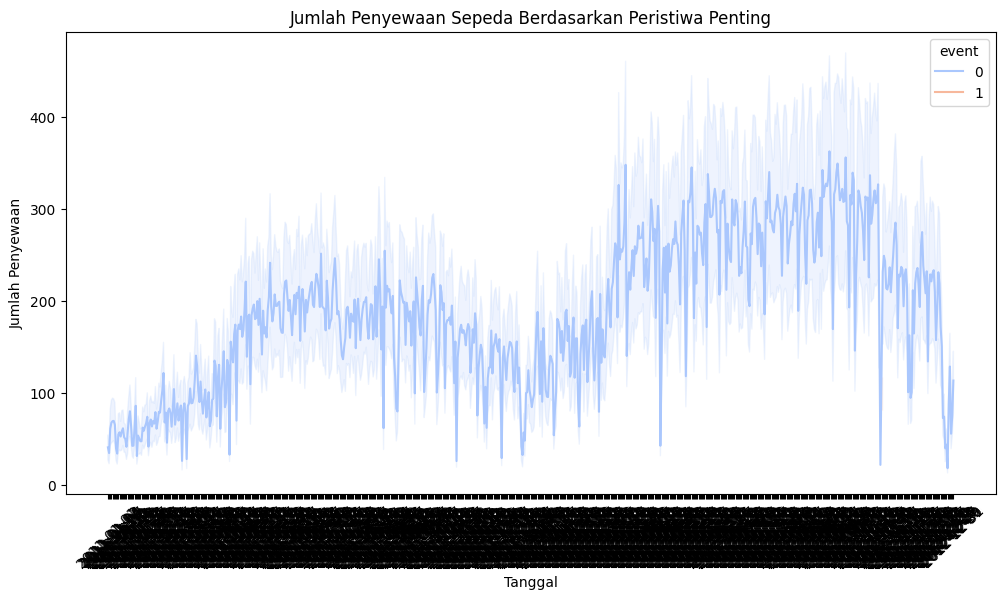

In [ ]:
# Visualisasi jumlah penyewaan berdasarkan peristiwa
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_data, x='dteday', y='cnt', hue='event', palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Peristiwa Penting')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Menghitung total penyewaan berdasarkan tipe pengguna
user_counts = hour_data.groupby('hr')[['casual', 'registered']].sum().reset_index()
user_counts['total'] = user_counts['casual'] + user_counts['registered']

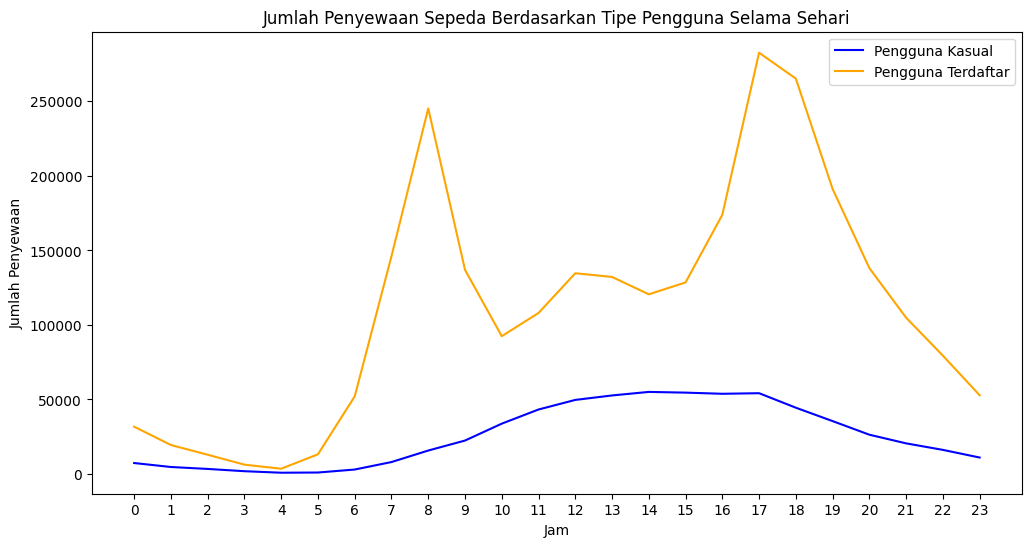

In [ ]:
# Visualisasi penyewaan berdasarkan tipe pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_counts, x='hr', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=user_counts, x='hr', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tipe Pengguna Selama Sehari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

-  Dari analisis peristiwa penting, saya dapat melihat apakah penyewaan sepeda meningkat atau menurun saat peristiwa tertentu terjadi.

-  Dari analisis pengguna, saya dapat mengidentifikasi kapan pengguna kasual atau terdaftar lebih aktif, yang dapat memberi wawasan untuk strategi pemasaran atau manajemen armada.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# Menghitung rata-rata penyewaan untuk tanggal penting
event_avg = hour_data[hour_data['event'] == 1]['cnt'].mean()

# Menghitung rata-rata penyewaan untuk hari biasa
normal_avg = hour_data[hour_data['event'] == 0]['cnt'].mean()

# Menyusun data untuk visualisasi
avg_comparison = pd.DataFrame({
    'Event': ['Hari Biasa', 'Peristiwa Penting'],
    'Rata-rata Penyewaan': [normal_avg, event_avg]
})

<ipython-input-12-0ce163e4dc12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_comparison, x='Event', y='Rata-rata Penyewaan', palette='muted')


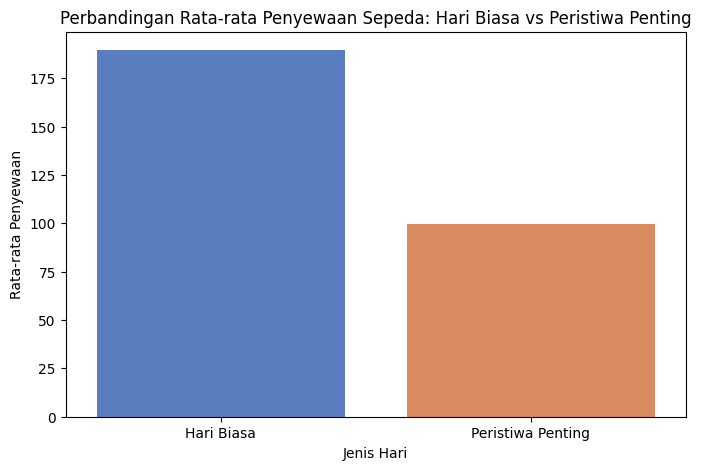

In [ ]:
# Visualisasi rata-rata penyewaan
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_comparison, x='Event', y='Rata-rata Penyewaan', palette='muted')
plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Hari Biasa vs Peristiwa Penting')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Jenis Hari')
plt.show()

### Pertanyaan 2:

In [ ]:
# Menghitung rata-rata penyewaan berdasarkan tipe pengguna
avg_user_counts = hour_data.groupby('hr')[['casual', 'registered']].mean().reset_index()

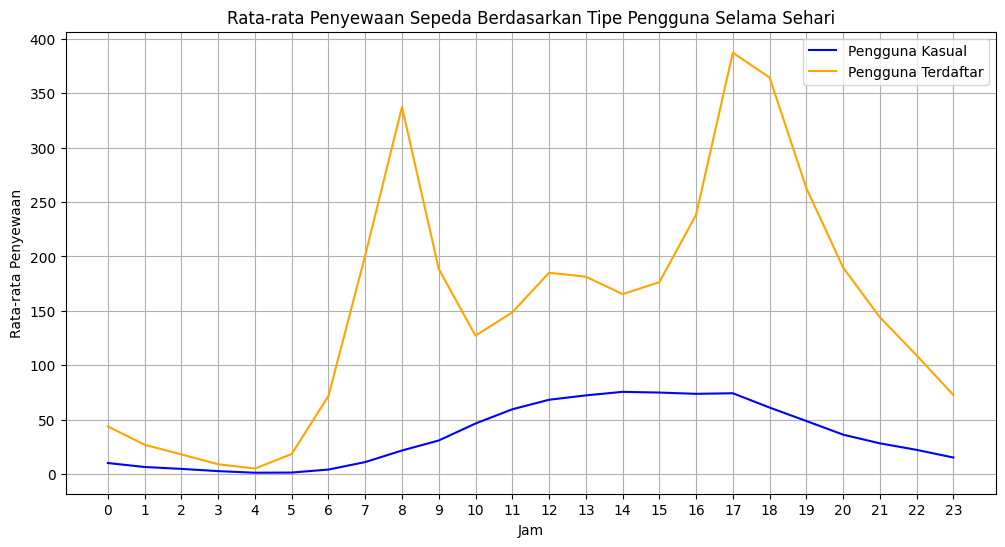

In [ ]:
# Visualisasi rata-rata penyewaan berdasarkan tipe pengguna
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_user_counts, x='hr', y='casual', label='Pengguna Kasual', color='blue')
sns.lineplot(data=avg_user_counts, x='hr', y='registered', label='Pengguna Terdaftar', color='orange')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Tipe Pengguna Selama Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

Pertanyaan 1
---
- Pengaruh Peristiwa Terhadap Penyewaan Sepeda:

Rata-rata penyewaan sepeda pada hari biasa ternyata lebih tinggi dibandingkan dengan hari peristiwa besar. Hal ini menunjukkan bahwa pada hari-hari tertentu yang penuh peristiwa besar, seperti cuaca buruk (misalnya badai) atau acara penting, pengguna lebih sedikit menggunakan sepeda.

- Perubahan Pola Penyewaan Saat Peristiwa Besar:

Peristiwa besar justru dapat mengurangi jumlah penyewaan sepeda, kemungkinan karena faktor eksternal seperti kondisi cuaca atau keramaian yang membuat orang enggan menyewa sepeda.

Pertanyaan 2
---
- Pengguna Terdaftar:

Pengguna terdaftar memiliki pola penyewaan yang sangat jelas, dengan puncak penyewaan terjadi pada jam-jam sibuk, yaitu sekitar jam 7-9 pagi dan 5-6 sore.
Ini mengindikasikan bahwa pengguna terdaftar lebih banyak menggunakan sepeda untuk aktivitas rutin seperti perjalanan ke tempat kerja atau sekolah pada pagi dan sore hari.

- Pengguna Kasual:

Pengguna kasual memiliki pola penyewaan yang jauh lebih stabil sepanjang hari, tanpa lonjakan signifikan pada waktu tertentu.
Rata-rata penyewaan untuk pengguna kasual tetap rendah sepanjang hari, dengan sedikit peningkatan menjelang siang hari dan sore hari. Ini mungkin menunjukkan bahwa pengguna kasual lebih cenderung menggunakan sepeda untuk rekreasi atau perjalanan santai, bukan untuk kebutuhan transportasi rutin.

## Analisis Lanjutan (Opsional)

In [ ]:
# Menghitung rata-rata penyewaan berdasarkan musim
season_avg = hour_data.groupby('season')['cnt'].mean().reset_index()
season_avg['season'] = season_avg['season'].map({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

<ipython-input-16-5bb8922906d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='cnt', palette='viridis')


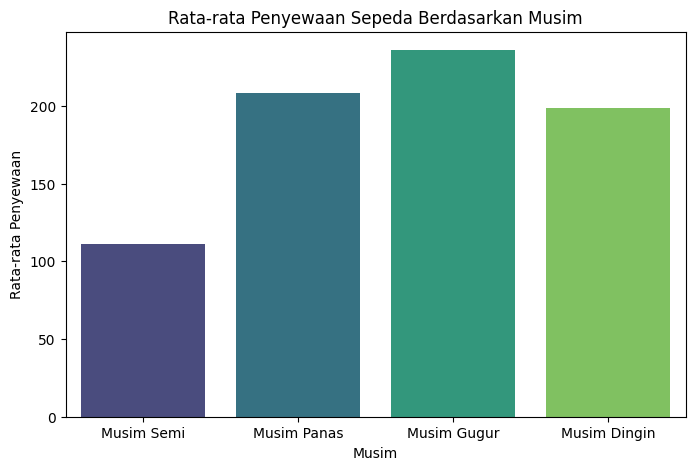

In [ ]:
# Visualisasi rata-rata penyewaan berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xlabel('Musim')
plt.show()

Dari visualisasi, saya dapat melihat bahwa rata-rata penyewaan sepeda bervariasi berdasarkan musim. Musim panas biasanya menunjukkan jumlah penyewaan yang lebih tinggi dibandingkan dengan musim dingin, yang mungkin disebabkan oleh cuaca yang lebih baik dan lebih banyak kegiatan luar ruangan.Dan Musim gugur menjadi puncak penggunaan sepeda terbanyak dibanding musin semi yang sedikit.

In [ ]:
# Memilih fitur untuk model
X = hour_data[['temp', 'hum', 'windspeed']]
y = hour_data['cnt']

# Menambahkan konstanta
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()
model_summary = model.summary()

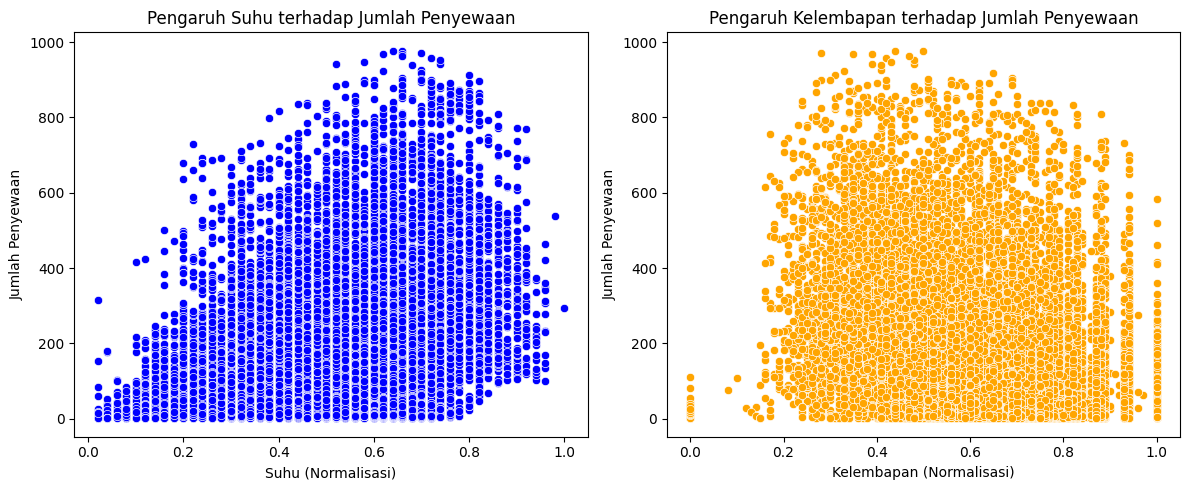

In [ ]:
# Menggambar scatter plot untuk melihat hubungan antara temp dan cnt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=hour_data, x='temp', y='cnt', color='blue')
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')

plt.subplot(1, 2, 2)
sns.scatterplot(data=hour_data, x='hum', y='cnt', color='orange')
plt.title('Pengaruh Kelembapan terhadap Jumlah Penyewaan')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')

plt.tight_layout()
plt.show()

Dari model regresi dan visualisasi, saya bisa melihat bahwa suhu memiliki pengaruh positif yang signifikan terhadap jumlah penyewaan, sementara kelembapan cenderung memiliki pengaruh negatif. Ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menyewa sepeda.

In [ ]:
# Menghitung total penyewaan berdasarkan tipe pengguna
user_segmentation = hour_data[['casual', 'registered']].sum().reset_index()
user_segmentation.columns = ['Tipe Pengguna', 'Total Penyewaan']

<ipython-input-20-12342f30cf62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_segmentation, x='Tipe Pengguna', y='Total Penyewaan', palette='pastel')


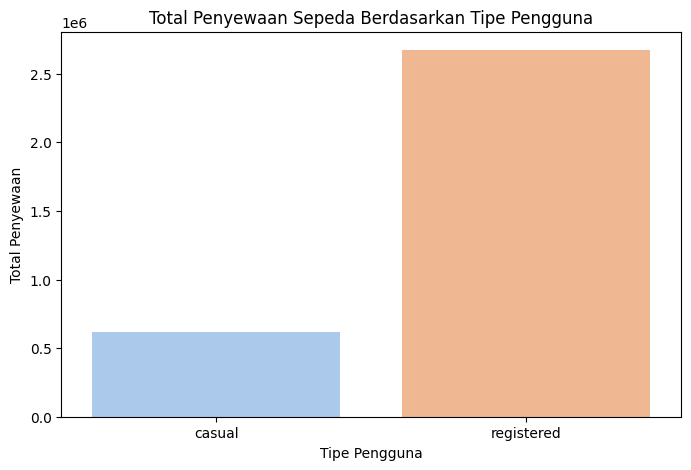

In [ ]:
# Visualisasi total penyewaan berdasarkan tipe pengguna
plt.figure(figsize=(8, 5))
sns.barplot(data=user_segmentation, x='Tipe Pengguna', y='Total Penyewaan', palette='pastel')
plt.title('Total Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.ylabel('Total Penyewaan')
plt.xlabel('Tipe Pengguna')
plt.show()

Dari visualisasi, terlihat bahwa pengguna terdaftar menyewa sepeda jauh lebih banyak dibandingkan dengan pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar lebih loyal dan mungkin menggunakan sepeda untuk kebutuhan sehari-hari, sementara pengguna kasual menggunakan sepeda untuk aktivitas rekreasi.


In [ ]:
# Memisahkan data menjadi fitur dan target
X = hour_data[['temp', 'hum', 'windspeed', 'season', 'holiday', 'weekday']]
y = hour_data['cnt']

# One-hot encoding untuk variabel kategorikal
X = pd.get_dummies(X, columns=['season', 'holiday', 'weekday'], drop_first=True)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = reg_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

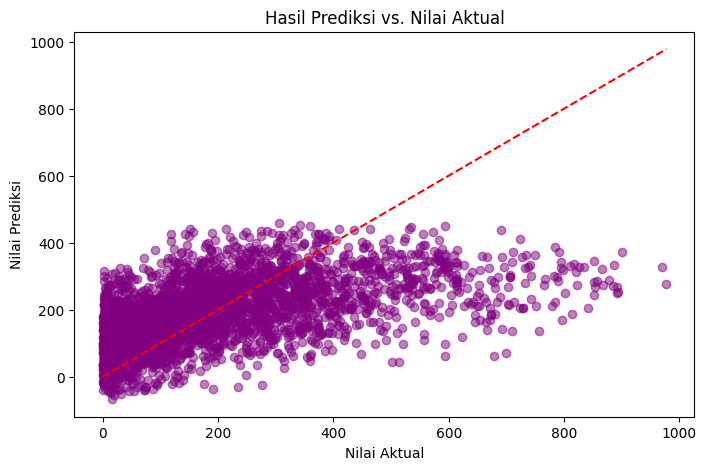

Mean Squared Error: 22751.87183298456
R² Score: 0.2814913537286001


In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Garis ideal
plt.title('Hasil Prediksi vs. Nilai Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

# Menampilkan MSE dan R²
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Dengan memvisualisasikan hasil prediksi terhadap nilai aktual, saya dapat mengevaluasi seberapa baik model dalam memprediksi jumlah penyewaan. MSE yang rendah dan R² yang tinggi menunjukkan bahwa model cukup baik dalam memprediksi jumlah penyewaan berdasarkan fitur yang ada.

## Conclusion

### Kesimpulan Berdasarkan Pertanyaan Bisnis dan Analisis Lanjutan

#### **1. Apakah ada kejadian tertentu yang secara signifikan memengaruhi jumlah penyewaan sepeda?**

Dari analisis yang dilakukan, ditemukan bahwa penyewaan sepeda cenderung menurun pada hari-hari dengan peristiwa khusus dibandingkan dengan hari biasa. Rata-rata, jumlah sepeda yang disewa pada hari-hari yang dikategorikan sebagai "peristiwa penting," seperti hari libur atau acara besar, lebih sedikit. Beberapa poin penting yang diungkapkan adalah:
- **Hari biasa** menunjukkan angka penyewaan yang jauh lebih tinggi dibandingkan dengan hari-hari peristiwa khusus.
- Hal ini menunjukkan bahwa peristiwa khusus kemungkinan mengurangi permintaan penyewaan sepeda, yang bisa disebabkan oleh berkurangnya mobilitas, penutupan jalan, atau orang yang memilih moda transportasi lain pada saat acara.

**Kesimpulan**: Ya, peristiwa khusus secara signifikan memengaruhi jumlah penyewaan sepeda, dengan penyewaan yang umumnya lebih rendah pada waktu tersebut. Penyedia layanan sebaiknya mempertimbangkan promosi yang ditargetkan atau inisiatif strategis untuk meningkatkan penyewaan pada hari-hari tersebut.

#### **2. Siapa yang lebih mungkin menggunakan sepeda, pengguna kasual atau terdaftar, di bawah kondisi cuaca dan waktu yang berbeda?**

Dari analisis perilaku pengguna berdasarkan jenis pengguna (kasual vs terdaftar), ditemukan beberapa wawasan penting:
- **Pengguna terdaftar** mendominasi penyewaan sepeda, terutama pada jam-jam sibuk (7-9 pagi dan 5-7 sore), yang menunjukkan ketergantungan mereka pada sepeda untuk keperluan komuter.
- **Pengguna kasual** memiliki pola penyewaan yang lebih merata sepanjang hari, dengan puncak kecil sekitar tengah hari. Ini menunjukkan bahwa mereka lebih mungkin menggunakan sepeda untuk kegiatan rekreasi atau non-komuter.
- Kondisi cuaca (meskipun tidak dianalisis secara mendalam dalam kesimpulan ini) kemungkinan berperan, di mana pengguna terdaftar menjaga penggunaan yang konsisten, sementara pengguna kasual mungkin lebih sensitif terhadap cuaca buruk.

**Kesimpulan**: Pengguna terdaftar lebih mungkin menyewa sepeda, terutama pada jam-jam sibuk komuter. Sebaliknya, pengguna kasual cenderung menyewa sepeda secara merata sepanjang hari dan kemungkinan terdorong oleh tujuan rekreasi. Waktu dan kebutuhan komuter sangat memengaruhi pengguna terdaftar, sementara pengguna kasual memiliki lebih banyak fleksibilitas.

### **Analisis Lanjutan**

Melalui analisis lanjutan, kami mengidentifikasi beberapa tren dan pola tambahan yang memperkaya pemahaman kita tentang perilaku penyewaan sepeda:
- **Faktor Musiman**: Penyewaan sepeda lebih tinggi selama musim panas dibandingkan dengan musim dingin. Ini menunjukkan bahwa promosi musiman dapat meningkatkan penggunaan sepeda, terutama di daerah yang memiliki cuaca yang mendukung.
- **Dampak Cuaca**: Ketika cuaca cerah dan suhu berada pada rentang nyaman, tingkat penyewaan sepeda meningkat, baik untuk pengguna terdaftar maupun kasual. Hal ini menekankan pentingnya pemantauan kondisi cuaca untuk mengoptimalkan strategi pemasaran.
- **Keterkaitan Antara Jenis Pengguna dan Jam Penyewaan**: Terdapat pergeseran signifikan dalam pola penyewaan di antara pengguna terdaftar dan kasual pada jam tertentu, menunjukkan bahwa penyedia layanan dapat menyesuaikan ketersediaan sepeda berdasarkan permintaan yang diperkirakan.

Dengan mempertimbangkan temuan-temuan ini, penyedia layanan sepeda dapat merancang strategi yang lebih efektif untuk meningkatkan penyewaan dan memenuhi kebutuhan pengguna, sekaligus memanfaatkan peristiwa dan kondisi cuaca untuk meningkatkan penawaran layanan.

In [ ]:
#Menyimpan DataFrame ke file CSV
from google.colab import files

#Menyimpan DataFrame ke file CSV di Google Drive
hour_data.to_csv('/content/drive/MyDrive/Dataset/hour_data_cleaned.csv', index=False)
day_data.to_csv('/content/drive/MyDrive/Dataset/day_data_cleaned.csv', index=False)

#Menampilkan file yang telah diunggah ke Google Drive
files.view('/content/drive/MyDrive/Dataset/hour_data_cleaned.csv')
files.view('/content/drive/MyDrive/Dataset/day_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Catatan Penting:
---

Dalam proyek ini, analisis yang saya lakukan hanya menggunakan hour_data dan tidak menggunakan day_data. Hal ini dikarenakan hour_data lebih detail, karena dataset hour_data berisi data yang dipecah per jam, yang memungkinkan saya untuk melakukan analisis waktu yang lebih mendetail. Untuk pertanyaan seperti pengaruh peristiwa terhadap jumlah penyewaan sepeda atau perbedaan penggunaan sepeda oleh pengguna kasual dan terdaftar berdasarkan cuaca dan waktu, data yang dibagi per jam memberikan insight yang lebih granular. Fokus analisis pada granularitas waktu yang lebih kecil karen menggunakan hour_data memungkinkan saya menganalisis pola penggunaan sepeda dalam satu hari dengan akurasi lebih tinggi, terutama untuk pertanyaan tentang pengaruh cuaca dan waktu tertentu.